In [34]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 





In [35]:
folder_path = os.getcwd()
folder_path = os.path.join(folder_path, 'ALL RPT')
files = os.listdir(folder_path)
print(files)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)
print(excel_files_sort)

OP_50 = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
capacity = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}


['CEL00145_RPT1_127.0.0.1-BTS83-32-2-7-2818573816.xlsx', 'CEL00133_RPT1_127.0.0.1-BTS83-32-2-3-2818573813.xlsx', 'CEL00138_RPT1_127.0.0.1-BTS83-32-2-8-2818573813.xlsx', 'CEL00131_RPT1_127.0.0.1-BTS83-32-2-1-2818573813.xlsx', 'CEL00135_RPT1_127.0.0.1-BTS83-32-2-5-2818573813.xlsx', 'CEL00137_RPT1_127.0.0.1-BTS83-32-2-7-2818573813.xlsx', 'CEL00141_RPT1_127.0.0.1-BTS83-32-2-3-2818573816.xlsx', 'CEL00139_RPT1_127.0.0.1-BTS83-32-2-1-2818573816.xlsx', 'CEL00142_RPT1_127.0.0.1-BTS83-32-2-4-2818573816.xlsx', 'CEL00143_RPT1_127.0.0.1-BTS83-32-2-5-2818573816.xlsx', '.ipynb_checkpoints', 'CEL00144_RPT1_127.0.0.1-BTS83-32-2-6-2818573816.xlsx', 'CEL00132_RPT1_127.0.0.1-BTS83-32-2-2-2818573813.xlsx', 'CEL00136_RPT1_127.0.0.1-BTS83-32-2-6-2818573813.xlsx', 'CEL00140_RPT1_127.0.0.1-BTS83-32-2-2-2818573816.xlsx', 'CEL00134_RPT1_127.0.0.1-BTS83-32-2-4-2818573813.xlsx']


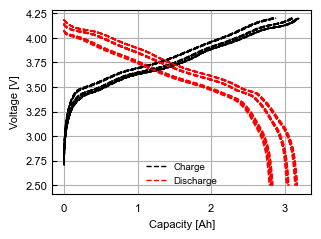

In [38]:
# Figure와 Axis 생성
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

for file in excel_files_sort[:]:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_excel(file_path, header=0, sheet_name='record')

    def filter_data(df, step_index):
        filtered_df = df[df['Step Index'].isin([step_index])]
        filtered_df.reset_index(drop=True, inplace=True)
        voltage_data = filtered_df['Voltage(V)']
        capacity_data = filtered_df['Capacity(Ah)']
        return voltage_data, capacity_data

    # 첫 번째 그룹 (Step Index: 4, 8, 12) - 검은색 플롯
    for i, step_index in enumerate([4, 8, 12]):
        voltage_data, capacity_data = filter_data(df, step_index)
        ax.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color='black')

    # 두 번째 그룹 (Step Index: 6, 10, 14) - 빨간색 플롯
    for i, step_index in enumerate([6, 10, 14]):
        voltage_data, capacity_data = filter_data(df, step_index)
        ax.plot(capacity_data, voltage_data, linestyle='--', linewidth=1, color='red')

# 수동으로 레전드 추가
ax.plot([], [], linestyle='--', linewidth=1, color='black', label='Charge')
ax.plot([], [], linestyle='--', linewidth=1, color='red', label='Discharge')

ax.set_xlabel('Capacity [Ah]')  # X축 타이틀
ax.set_ylabel('Voltage [V]')  

ax.grid()
ax.legend()  # 레전드를 추가합니다.

# 플롯을 표시합니다.
plt.show()